# **Análise dos Dados de Partidas de Futebol**

## Objetivo 

Os dados de partidas de futebol oferecem um grande potencial para compreender o desempenho dos times e os fatores que influenciam o resultado dos jogos. O objetivo deste projeto é analisar esses dados de forma exploratória, tratando valores ausentes de maneira cuidadosa para preservar suas características originais a fim de desenvolver um modelo preditivo.

## Obtenção dos dados

In [2122]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2123]:

# Lendo o arquivo 
df = pd.read_csv('Data/campeonatos_futebol_atualizacao.csv')

## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

- **Chutes a gol 1 / 2**: Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2.
- **Impedimentos 1 / 2**: Quantas vezes cada time foi pego em posição de impedimento.
- **Escanteios 1 / 2**: Total de cobranças de escanteio a favor de cada equipe.
- **Chutes fora 1 / 2**: Finalizações que não foram na direção do gol (para fora) de cada time.
- **Faltas 1 / 2**: Quantas faltas cada time cometeu durante a partida.
- **Cartões amarelos 1 / 2**: Quantos cartões amarelos foram mostrados a jogadores de cada time.
- **Cartões vermelhos 1 / 2**: Quantos cartões vermelhos foram mostrados a jogadores de cada time.
- **Cruzamentos 1 / 2**: Número de passes laterais elevados (cruzamentos) realizados por cada equipe.
- **Laterais 1 / 2**: Quantas vezes cada time executou arremessos laterais.
- **Chutes bloqueados 1 / 2**: Finalizações de cada time que foram bloqueadas por defensores adversários.
- **Contra-ataques 1 / 2**: Quantas ações de contra-ataque (recuperação e transição rápida) cada equipe conduziu.
- **Gols 1 / 2**: Número de gols marcados por cada time.
- **Tiro de meta 1 / 2**: Quantos arremessos de meta (goal kicks) cada time cobrou.
- **Tratamentos 1 / 2**: Quantas vezes jogadores de cada time receberam atendimento médico em campo.
- **Substituições 1 / 2**: Número de trocas de jogadores realizadas por cada equipe.
- **Tiros-livres 1 / 2**: Quantas cobranças de falta (tiros livres) cada time teve.
- **Defesas difíceis 1 / 2**: Número de defesas de alta dificuldade feitas pelos goleiros de cada time.
- **Posse 1 / 2 (%)**: Percentual de tempo de posse de bola de cada equipe ao longo da partida.
- **Time 1 / 2**: Nome do time da casa (1) e do time visitante (2).
- **Position 1 / 2**: Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).

Vamos dar uma olhada nas primeiras linhas do Dataframe.


In [2124]:
#Primeiras 5 linhas 
df.head()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


### Quantas linhas e colunas o conjunto de dados possui? Quais os tipos das variáveis? 

In [2125]:
# Tamanho do DataFrame
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}\n')

# Tipos de dados de cada coluna
print("Tipos de dados por coluna:\n")
print(df.dtypes)

Número de linhas: 27716
Número de colunas: 40

Tipos de dados por coluna:

Chutes a gol 1         float64
Chutes a gol 2         float64
Impedimentos 1         float64
Impedimentos 2         float64
Escanteios 1           float64
Escanteios 2           float64
Chutes fora 1          float64
Chutes fora 2          float64
Faltas 1               float64
Faltas 2               float64
Cartões amarelos 1     float64
Cartões amarelos 2     float64
Cartões vermelhos 1    float64
Cartões vermelhos 2    float64
Cruzamentos 1          float64
Cruzamentos 2          float64
Laterais 1             float64
Laterais 2             float64
Chutes bloqueados 1    float64
Chutes bloqueados 2    float64
Contra-ataques 1       float64
Contra-ataques 2       float64
Gols 1                 float64
Gols 2                 float64
Tiro de meta 1         float64
Tiro de meta 2         float64
Tratamentos 1          float64
Tratamentos 2          float64
Substituições 1        float64
Substituições 2        flo

## Limpeza e transformação dos dados

A simetria da distribuição será inicialmente avaliada com o objetivo de compreender o comportamento dos dados antes de qualquer etapa de limpeza ou transformação. Essa análise preliminar permite identificar possíveis distorções, como a presença de outliers ou distribuições assimétricas, além de fornecer uma base para comparação com os resultados obtidos após o pré-processamento.

A avaliação da simetria será feita por meio da métrica chamada skewness (ou coeficiente de assimetria), que indica o grau de inclinação da curva de distribuição. Quando o valor de skewness é próximo de zero, a distribuição é considerada simétrica. Valores positivos indicam uma cauda longa à direita (assimetria positiva) e valores negativos, uma cauda longa à esquerda (assimetria negativa). Em geral, considera-se que distribuições com skewness entre -0.5 e 0.5 são aproximadamente simétricas.

In [2126]:
# Selecionando apenas colunas numéricas
colunas_numericas = df.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)



                     Assimetria (skewness) Distribuição
Chutes fora 2                    99.858429  Assimétrica
Cartões vermelhos 1               4.632811  Assimétrica
Cartões vermelhos 2               4.430716  Assimétrica
Faltas 2                          2.820571  Assimétrica
Contra-ataques 2                  2.147097  Assimétrica
Contra-ataques 1                  2.023837  Assimétrica
Chutes a gol 2                    1.968407  Assimétrica
Chutes a gol 1                    1.812375  Assimétrica
Tratamentos 1                     1.501920  Assimétrica
Tratamentos 2                     1.372405  Assimétrica
Impedimentos 2                    1.198815  Assimétrica
Impedimentos 1                    1.181808  Assimétrica
Chutes bloqueados 1               1.129360  Assimétrica
Chutes bloqueados 2               1.122076  Assimétrica
Gols 2                            1.104355  Assimétrica
Gols 1                            0.960099  Assimétrica
Cruzamentos 2                     0.906040  Assi

A análise da assimetria (skewness) mostrou que a maior parte das várias variáveis numéricas do conjunto apresenta distribuições assimétricas que acontece devido a aleatoridade das variáveis. Isso acontece pleo fato de não existir uma métrica fixa para distribuição de uma variavel em todos as partidas devido ao enorme número de fatores do qual ela depende. Por exemplo:  um time que tem um alto número de contra-ataques em uma partida pode não ter em outras, pois:
-  Depende do time com quem está jogando e se esse atua mais na defensiva ou ofensiva. Atuar na defensiva ou ofensiva depende da estratégia de jogo definida para aquela partida específica; 
- O placar ao longo da partida influencia no número de contra-ataques realizados ao longo do jogo. Quando uma equipe está perdendo, pode se expor mais no campo, permitindo que o time adversário consiga mais contra-ataques. Isso pode gerar uma distribuição assimétrica, com alguns jogos tendo números muito altos de contra-ataques devido a uma maior pressão em busca do empate ou da virada;
- O futebol é um esporte sujeito a erros, como falhas defensivas, passes errados, ou um goleiro cometendo um erro. Tais erros podem criar oportunidades para contra-ataques, especialmente se uma equipe está avançando de forma descuidada e o adversário aproveita para atacar em velocidade;
- Condições climáticas, como chuva ou vento forte, podem afetar a forma como as equipes jogam. Um campo escorregadio pode dificultar o controle da bola, levando a mais erros e, consequentemente, mais oportunidades para contra-ataques.

Por esses e diversos outros motivos uma equipe mesmo que seja considerada mais "fraca"  pode ganhar de uma equipe considerada maia "forte".
Esse comportamento pode comprometer a consistência da análise estatística e a performance de modelos que assumem distribuições mais equilibradas. Por isso, nas próximas etapas, será realizado o tratamento de valores duplicados e outliers com o objetivo de reduzir essa assimetria, mas não visando tornar os dados complemente simétricos devido a aletoridade do conjunto. 

### Tratando linhas duplicadas

Verificando se há registros duplicados no Dataframe, pois não nos interessar analisar a mesma partida mais de uma vez. 

In [2127]:

# Verificando se há linhas duplicadas no dataframe
if df.duplicated().any():
    # Contando o número total de linhas duplicadas
    quantidade_duplicadas = df.duplicated().sum()
    print(f'Sim, existem {quantidade_duplicadas} linhas duplicadas.')
else:
    print('Não, não existem linhas duplicadas.')


Sim, existem 12 linhas duplicadas.


Identificamos a presença de registros duplicados no dataframe. Na ausência de uma coluna com a data das partidas, adotamos o critério de considerar duplicatas exatas como representações da mesma partida. 

Assim, como cada linha representa uma partida de futebol, essas duplicatas indicam possíveis inconsistências, como erros de entrada ou falhas na coleta de dados.

A remoção dessas entradas garante que cada partida seja considerada apenas uma vez, preservando a integridade do conjunto de dados e evitando distorções nas análises estatísticas.

In [2128]:
# Retorna um novo Dataframe com apenas as linhas não duplicadas 
df_sem_duplicadas = df_copy.loc[~df_copy.duplicated()].drop_duplicates().reset_index(drop=True)

# Verificando novamente se há linhas duplicadas no dataframe
if df_sem_duplicadas.duplicated().any():
    # Contando o número total de linhas duplicadas
    quantidade_duplicadas = df_sem_duplicadas.duplicated().sum()
    print(f'Sim, existem {quantidade_duplicadas} linhas duplicadas.')
else:
    print('Não, não existem linhas duplicadas.')

Não, não existem linhas duplicadas.


### Qual a porcentagem de valores ausentes no dataset?

Vamos analisar a porcentagem de Not a Number em cada coluna.

In [2129]:
# Porcentagem de NaN
def pegaPorcentagemNulaTabelas(tabela):
  return (tabela.isnull().sum()/len(tabela)*100).sort_values(ascending=False)

tabelaPorcentagem = pegaPorcentagemNulaTabelas(df_sem_duplicadas)

print(tabelaPorcentagem)

print(df_sem_duplicadas.dtypes)

Tratamentos 2          81.883483
Tratamentos 1          81.883483
Defesas difíceis 2     77.671094
Defesas difíceis 1     77.671094
Tiros-livres 1         77.490615
Tiros-livres 2         77.490615
Contra-ataques 2       77.393156
Contra-ataques 1       77.393156
Chutes bloqueados 1    68.080422
Chutes bloqueados 2    68.080422
Cruzamentos 1          67.459573
Cruzamentos 2          67.459573
Substituições 1        66.001299
Substituições 2        66.001299
Tiro de meta 1         56.666907
Tiro de meta 2         56.666907
Laterais 1             45.289489
Laterais 2             45.289489
Impedimentos 1         10.005775
Impedimentos 2         10.005775
Posse 1(%)              8.478920
Posse 2(%)              8.478920
Escanteios 1            8.399509
Escanteios 2            8.399509
Chutes fora 2           8.385071
Chutes fora 1           8.385071
Faltas 1                8.377852
Faltas 2                8.377852
Position 2              5.883627
Position 1              5.782558
Chutes a g

Considerando que os valores das correlações de Pearson e Spearman são muito baixo atrelado ao alto números de NaN as colunas eliminadas serão: Tratamentos 1, Tratamentos 2, Substituições 1, Substituições 2, Laterais 1, Laterais 2, Tiro de meta 1 e Tiro de meta 2.

As variáveis Tratamentos 1 e Tratamentos 2 serão removidas do conjunto de dados devido à elevada proporção de valores ausentes, superior a 81%. Como esses eventos não são recorrentes em todas as partidas e, muitas vezes, não têm relação direta com o desempenho técnico ou tático das equipes, sua presença esparsa reduz sua utilidade como variável. Além disso, a aleatoriedade desses acontecimentos — que podem depender de fatores externos como choques acidentais ou condições do gramado — dificulta sua utilização como indicador consistente de tendência ou influência no resultado da partida. 

As variáveis Substituições 1 e Substituições 2 serão removidas do conjunto de dados por apresentarem aproximadamente 66% de valores ausentes e pelo modo como influencia o resultado de um jogo. Embora as substituições possam influenciar momentaneamente o desempenho de uma equipe, sua frequência e impacto variam bastante entre os jogos, dificultando uma análise consistente. Além disso, a alta taxa de dados faltantes indica que essa informação não foi registrada com regularidade, o que compromete sua utilidade como variável preditiva. Como seu efeito no resultado final da partida tende a ser indireto e situacional — muitas vezes relacionado a estratégias específicas, lesões ou decisões de gestão de elenco — optou-se por sua exclusão.

Por fim, as variáveis Tiro de meta 1 e Tiro de meta 2 foram retiradas do conjunto porque além de mais da metade dos valores estão ausentes (cerca de 56%), esse tipo de lance normalmente não tem grande influência no resultado da partida, já que é só uma forma de reiniciar o jogo depois que a bola sai pela linha de fundo. Como não costumam gerar lances importantes, como gols ou assistências, e ainda têm muitos dados faltando, foi decidido remover essas variáveis da análise.



In [2130]:
# Lista das colunas a serem eliminadas
colunas_para_deletar = [
    'Tratamentos 1', 'Tratamentos 2',
    'Substituições 1', 'Substituições 2',
    'Chutes bloqueados 1','Chutes bloqueados 2',
    'Cruzamentos 1', 'Tiro de meta 1', 'Tiro de meta 2',
    'Cruzamentos 2',    
]
# Filtrando para manter apenas as colunas que existem no DataFrame
colunas_existentes = [col for col in colunas_para_deletar if col in df_sem_duplicadas.columns]

# Deletando as colunas que existem
# Criando uma variável para guardar o df com sem as colunas NaN escolhidas acima
df_sem_nan = df_sem_duplicadas.drop(columns=colunas_existentes)

print(f'Número de colunas: {df_sem_nan.shape[1]}\n')


Número de colunas: 30



Em seguida, optou-se pela imputação pela mediana nas colunas numéricas, considerando que a maioria dessas variáveis não apresenta distribuição normal. Já para as colunas categóricas (Position 1, Position 2, Time 1 e Time 2) com valores ausentes, a imputação foi realizada por meio da moda, ou seja, o valor mais frequente da variável. Essa abordagem é adequada, pois essas colunas não são numéricas, o que inviabiliza o uso de medidas como a média ou a mediana. A moda, por sua vez, é a medida de tendência central mais apropriada para dados categóricos, permitindo preencher os valores ausentes com a categoria mais representativa e, assim, preservar a estrutura original da variável.


In [2131]:
# Imputa os NaNs pela mediana de cada coluna
def preencheTabelaComMediana():
    colunas_excecao = ['Time 1', 'Time 2', 'Position 1', 'Position 2']
    colunas_para_imputar = [
        col for col in df_sem_nan.columns
        if col not in colunas_excecao and pd.api.types.is_numeric_dtype(df_sem_nan[col])
    ]
    
    for col in colunas_para_imputar:
        mediana = df_sem_nan[col].median()
        df_sem_nan[col] = df_sem_nan[col].fillna(mediana)
    
    return df_sem_nan

#def_sem_nan = preencheTabelaComMediana()


In [2132]:
# Preenchemos apenas a posição com moda pelo fato de sua coluna ser tipada como um string
def preencheTabelaComModa():
    modaP1, modaP2 = df_sem_nan['Position 1'].mode()[0],df_sem_nan['Position 2'].mode()[0]
    df_sem_nan['Position 1']=df_sem_nan['Position 1'].fillna(modaP1)
    df_sem_nan['Position 2']=df_sem_nan['Position 2'].fillna(modaP2)
    return df_sem_nan



### Tratando Outliers

O tratamento de outliers é fundamental em distribuições assimétricas como as observadas neste conjunto de dados, pois valores extremos podem distorcer estatísticas descritivas, impactar a performance de modelos preditivos e  esconder padrões. No contexto de dados esportivos, como partidas de futebol, essas anomalias podem surgir por erros de coleta, registros duplicados ou situações atípicas que não representam o comportamento geral. Ao tratar os outliers, buscamos reduzir a assimetria e tornar as análises mais representativas da realidade. Essa etapa é especialmente importante antes da aplicação de técnicas de aprendizado de máquina, que muitas vezes assumem distribuições mais próximas da normalidade.

O método escolhido para tratar os outliers foi uma adaptação do IQR (Intervalo Interquartil), uma técnica eficaz para identificar valores atípicos em distribuições que não seguem uma forma normal. Tradicionalmente, o IQR é calculado como a diferença entre o terceiro quartil (Q3, 75%) e o primeiro quartil (Q1, 25%), sendo considerados outliers os valores que estão fora do intervalo entre Q1 - 1,5 * IQR e Q3 + 1,5 * IQR.

No entanto, como os dados analisados são de partidas de futebol — naturalmente sujeitos a assimetrias, variações extremas e aleatoriedade —, adotou-se uma abordagem mais flexível, ampliando os limites do IQR para os percentis 4% (Q4) e 96% (Q96). Essa escolha permite manter no conjunto de dados os eventos atípicos moderados, que fazem parte do contexto esportivo, e remover apenas os valores extremamente discrepantes, que poderiam afetar negativamente o desempenho dos modelos.

Essa versão mais permissiva do IQR mantém a robustez do método, ao mesmo tempo que evita perdas excessivas de dados informativos. Além disso, contribuiu diretamente para o aumento da acurácia do modelo de regressão logística utilizado, demonstrando que o ajuste foi eficaz tanto estatisticamente quanto em termos de performance preditiva.



In [2133]:
# Definindo o threshold para o IQR
threshold = 1.5

# Selecionando apenas colunas numéricas
numeric_cols = df_sem_nan.select_dtypes(include='number').columns

# Criando um dicionário para armazenar os resultados
outliers_por_coluna = {}

for col in numeric_cols:
    Q1 = df_sem_nan[col].quantile(0.04)
    Q3 = df_sem_nan[col].quantile(0.96)
    IQR = Q3 - Q1
    outliers = df_sem_nan[(df_sem_nan[col] < Q1 - threshold * IQR) | (df_sem_nan[col] > Q3 + threshold * IQR)]
    outliers_por_coluna[col] = len(outliers)

# Criando uma tabela
tabela_outliers = pd.DataFrame.from_dict(outliers_por_coluna, orient='index', columns=['Quantidade de Outliers'])
tabela_outliers = tabela_outliers.sort_values(by='Quantidade de Outliers', ascending=False)

print(tabela_outliers)


                     Quantidade de Outliers
Gols 2                                    8
Impedimentos 2                            5
Contra-ataques 1                          5
Contra-ataques 2                          4
Cartões vermelhos 2                       3
Faltas 2                                  3
Chutes a gol 2                            2
Chutes a gol 1                            1
Chutes fora 2                             1
Impedimentos 1                            1
Cartões vermelhos 1                       1
Cartões amarelos 1                        1
Faltas 1                                  1
Escanteios 1                              0
Chutes fora 1                             0
Escanteios 2                              0
Laterais 2                                0
Cartões amarelos 2                        0
Laterais 1                                0
Gols 1                                    0
Tiros-livres 1                            0
Tiros-livres 2                  

In [2134]:
# Inicializa df_sem_out com uma cópia de df_sem_nan
df_sem_out = df_sem_nan.copy()

# Criar uma tabela com a quantidade de outliers antes e depois da remoção
outliers_table = pd.DataFrame(columns=['Coluna', 'Outliers Antes', 'Outliers Depois'])

# Para cada coluna numérica
for col in numeric_cols:
    # Contagem de outliers antes da remoção
    Q1 = df_sem_out[col].quantile(0.04)
    Q3 = df_sem_out[col].quantile(0.96)
    IQR = Q3 - Q1
    outliers_antes = df_sem_nan[(df_sem_nan[col] < Q1 - threshold * IQR) | (df_sem_nan[col] > Q3 + threshold * IQR)].shape[0]
    
    # Identificando os outliers para excluir
    outliers = df_sem_out[(df_sem_out[col] < Q1 - threshold * IQR) | (df_sem_out[col] > Q3 + threshold * IQR)]
    
    # Contagem de outliers depois da remoção
    outliers_depois = outliers.shape[0]
    
    # Excluindo os outliers
    df_sem_out = df_sem_out.drop(outliers.index)

    # Adicionar as informações à tabela com pd.concat
    new_row = pd.DataFrame({'Coluna': [col], 'Outliers Antes': [outliers_antes], 'Outliers Depois': [outliers_depois]})
    outliers_table = pd.concat([outliers_table, new_row], ignore_index=True)

# Imprimir a tabela com as quantidades de outliers
print(outliers_table)



                 Coluna Outliers Antes Outliers Depois
0        Chutes a gol 1              1               1
1        Chutes a gol 2              2               2
2        Impedimentos 1              1               1
3        Impedimentos 2              5               5
4          Escanteios 1              0               0
5          Escanteios 2              0               0
6         Chutes fora 1              0               0
7         Chutes fora 2              1               1
8              Faltas 1              1               1
9              Faltas 2              3               2
10   Cartões amarelos 1              1               1
11   Cartões amarelos 2              0               0
12  Cartões vermelhos 1              1               1
13  Cartões vermelhos 2              3               3
14           Laterais 1              0               0
15           Laterais 2              0               0
16     Contra-ataques 1              5               5
17     Con

### Verificando novamente a simetria da distribuição

Após a remoção de outliers e imputação de valores ausentes, é importante verificar a assimetria novamente para avaliar o impacto dessas transformações nas distribuições. Muitas variáveis apresentaram alta assimetria inicialmente, o que pode afetar negativamente os modelos analíticos. Ao verificar a assimetria após as limpezas, garantimos que as distribuições estejam mais equilibradas, o que é crucial para análises mais precisas e confiáveis.

In [2135]:
# Selecionando apenas colunas numéricas
colunas_numericas = df_sem_out.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)

                     Assimetria (skewness) Distribuição
Cartões vermelhos 1               4.600123  Assimétrica
Cartões vermelhos 2               4.289490  Assimétrica
Contra-ataques 2                  1.900061  Assimétrica
Contra-ataques 1                  1.745547  Assimétrica
Impedimentos 2                    1.142791  Assimétrica
Impedimentos 1                    1.117924  Assimétrica
Gols 2                            1.056505  Assimétrica
Gols 1                            0.960249  Assimétrica
Defesas difíceis 2                0.871761  Assimétrica
Defesas difíceis 1                0.851646  Assimétrica
Chutes fora 2                     0.845727  Assimétrica
Chutes a gol 2                    0.816130  Assimétrica
Chutes fora 1                     0.800533  Assimétrica
Chutes a gol 1                    0.777907  Assimétrica
Escanteios 2                      0.744174  Assimétrica
Escanteios 1                      0.684681  Assimétrica
Cartões amarelos 1                0.636251  Assi

### Mudando o tipo de variável das colunas

Vamos codificar as colunas Position 1, Position 2, Time 1 e Time 2.

In [2136]:
# Colunas não numéricas: Time e Position

# Unindo valores únicos dos dois dataframes tratados
times = np.union1d(df_sem_out['Time 1'].dropna().unique(), df_sem_out['Time 2'].dropna().unique())
times_codigo = {times[i]: (i+1) for i in range(len(times))}
print("Total de Times = {}".format(len(times)))

posicoes = np.union1d(df_sem_out['Position 1'].dropna().unique(), df_sem_out['Position 2'].dropna().unique())
posicoes_codigo = {posicoes[i]: (i+1) for i in range(len(posicoes))}
print("Total de Formações = {}".format(len(posicoes)))

# Função corrigida para aplicar no df passado como argumento
def insere_coluna_codificada(df_sem_out, coluna, nome_coluna_codigo, dicionario_codificacao):
    if nome_coluna_codigo not in df_sem_out.columns:
        df_sem_out.insert(df_sem_out.columns.get_loc(coluna) + 1, nome_coluna_codigo, df[coluna].map(dicionario_codificacao))

# Cria o dataframe com as colunas não numéricas codificadas em novas
df_codificado = df_sem_out.copy()

# Aplica as codificações
insere_coluna_codificada(df_codificado, 'Position 1', 'Pos1_codigo', posicoes_codigo)
insere_coluna_codificada(df_codificado, 'Position 2', 'Pos2_codigo', posicoes_codigo)
insere_coluna_codificada(df_codificado, 'Time 1', 'Time1_codigo', times_codigo)
insere_coluna_codificada(df_codificado, 'Time 2', 'Time2_codigo', times_codigo)

df_codificado.head()


Total de Times = 310
Total de Formações = 30


,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Posse 1(%),Posse 2(%),Time 1,Time1_codigo,Time 2,Time2_codigo,Position 1,Pos1_codigo,Position 2,Pos2_codigo
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,77.0,23.0,Glasgow Rangers,119,Livingston,171,4-3-3,23.0,4-3-3,23.0
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,44.0,56.0,Ross County,236,St.Johnstone,260,3-5-2,12.0,3-5-2,12.0
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,47.0,53.0,Dundee FC,86,St. Mirren,259,4-3-3,23.0,3-4-1-2,8.0
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,27.0,73.0,Hearts,129,Celtic,69,3-4-3,10.0,4-2-3-1,20.0
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,58.0,42.0,Aberdeen,4,Dundee U.,87,4-4-2,25.0,3-5-1-1,11.0


# Análise de Correlação

Foi usado o Pearon da biblioteca Pandas.

<Axes: >

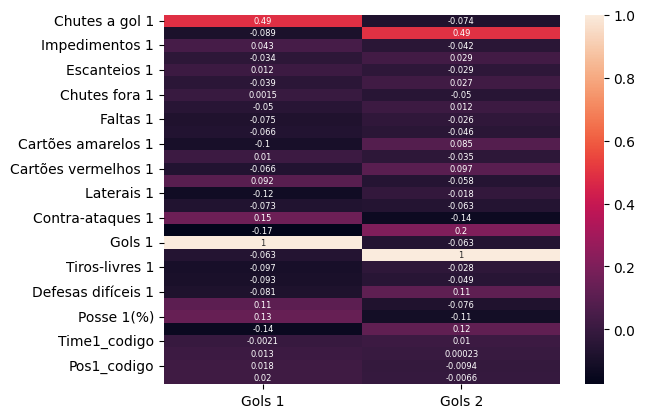

In [2137]:
correlacoes = df_codificado.drop(['Time 1', 'Time 2', 'Position 1', 'Position 2'], axis=1).corr()
#sns.heatmap(correlacoes)

correlacoes_com_Gols = pd.DataFrame({
    "Gols 1": correlacoes['Gols 1'], 
    "Gols 2": correlacoes['Gols 2'], 
})

sns.heatmap(correlacoes_com_Gols, annot=True, annot_kws={"size":6})

# Análise de Correlação com Empate

# Modelo Preditivo

Inicialmente é necessario criar uma coluna target de resultados para que o modelo consiga comparar o que ele previu com o que realmente aconteceu. Essa nova coluna tem valores:
- 1: time 1 venceu;
- 2: time 2 venceu; 

In [2138]:
# 1 = time 1 venceu, 0 = empate, -1 = time 2 venceu
def classifica_resultado(g1, g2):
    if g1 > g2:
        return 1
    elif g2 > g1:
        return 2

df_codificado['resultado'] = df_codificado.apply(lambda row: classifica_resultado(row['Gols 1'], row['Gols 2']), axis=1)

In [2139]:

# Exibindo as primeiras linhas da tabela com a nova coluna
print(df_codificado[['Gols 1', 'Gols 2', 'resultado']])


       Gols 1  Gols 2  resultado
0         3.0     0.0        1.0
1         0.0     0.0        NaN
2         2.0     2.0        NaN
3         2.0     1.0        1.0
4         2.0     0.0        1.0
...       ...     ...        ...
27699     0.0     1.0        2.0
27700     4.0     0.0        1.0
27701     4.0     0.0        1.0
27702     1.0     1.0        NaN
27703     0.0     0.0        NaN

[27669 rows x 3 columns]


In [2140]:
df_codificado['Laterais 2'] = df_codificado['Laterais 2'].fillna(
df_codificado['Laterais 2'].median())

In [2141]:
# Lista de variáveis para o modelo
features = [
    'Chutes a gol 1', 'Chutes a gol 2',
    'Contra-ataques 1', 'Contra-ataques 2',
    'Cartões vermelhos 2', 'Cartões amarelos 1',
    'Cartões vermelhos 1', 'Laterais 2'
]

df_codificado['resultado'] = df_codificado.apply(lambda row: classifica_resultado(row['Gols 1'], row['Gols 2']), axis=1)

# Remover linhas com NaN nas colunas usadas
df_treino = df_codificado.dropna(subset=features + ['resultado'])

# Separar X e y
X = df_treino[features]
y = df_treino['resultado']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)

# Treina o modelo
modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
modelo.fit(X_train, y_train)

# Fazer previsões e avaliar
y_pred = modelo.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia: 0.81625

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.83      0.87      0.85       474
         2.0       0.80      0.74      0.77       326

    accuracy                           0.82       800
   macro avg       0.81      0.80      0.81       800
weighted avg       0.82      0.82      0.81       800



c:\Users\laisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
